#### **Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal

#### **Create data function and define hyperparameters**

In [2]:
N = 2 # function variable dimension size

n_var_function = lambda x: np.sum(-x*np.sin(np.sqrt(np.abs(x))), axis=-1)

def var_function(x, y):
    return -x*np.sin(np.sqrt(np.abs(x))) - y*np.sin(np.sqrt(np.abs(y)))

array_of_min_var = np.array([-500 for _ in range(N)])
array_of_max_var = np.array([500 for _ in range(N)])

minimum_point = np.array([420.98, 420.98])
minimum_function_data = -873.96

#### **Visualize 3d graph**

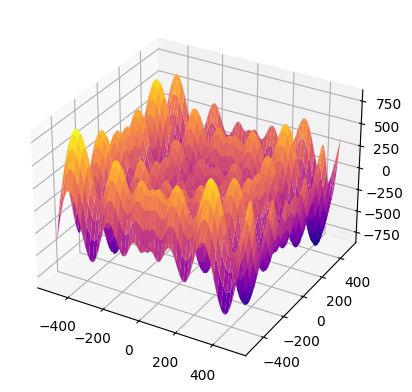

In [3]:
x = np.linspace(array_of_min_var[0], array_of_max_var[0], 1000)

y = np.linspace(array_of_min_var[1], array_of_max_var[1], 1000)

X, Y = np.meshgrid(x, y)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, var_function(X, Y), cmap="plasma")

plt.show()

#### **Define stochastic method of minimization**

In [4]:
def stochastic_minima_of_fuction(func, N, num_itter, min_x, max_x):
    min_point = None
    min_function = None
    for _ in range(num_itter):
        random_point = min_x + (max_x-min_x)*np.random.uniform(size=N)
        if min_function == None or func(random_point) < min_function:
            min_point = random_point
            min_function = func(random_point)
    return  min_point, min_function

In [5]:
import random
  
def simulated_annealing(f, minx, maxx, T=50.0, T_min=0.00001, alpha=0.999, init_x=np.array([0, 0])):
    # Initialize parameters 
    # maxx and minx are arrays of limit values for each variable
    # T -- Initial temperature 
    # T_min -- Minimum temperature 
    # alpha -- Temperature reduction rate 
    # x_min -- Initial solution
    x_min = init_x
    while T > T_min:
        # Generate new solution randomly 
        x_new = np.random.normal(loc=0.0, scale=1.0, size=x_min.size)*T

        # Calculate energy of current and new solutions  
        E_curr = f(x_min) 
        E_new = f(x_new)

        # Calculate acceptance probability  
        p = np.exp((E_curr - E_new)/T)

        # Decide whether to accept the new solution  
        if E_new < E_curr or random.random() < p:  
            x_min = x_new

        # Reduce temperature according to cooling schedule  
        T *= alpha
    return x_min, f(x_min)

In [6]:
import numpy as np

def simulated_annealing_2(acquisition, X0=np.array([0, 0]), \
                        limits = np.array([-10, 10]), T=50, T0=0.001, \
                        v=0.99, max_iter=10000):
    """
    Simulated Annealing Method Algorithm
    :param acquisition: function to optimize
    :param N_var: count of variables in function
    :param T: initial temperature (default 50)
    :param T0: minimum temperature (default 0.001)
    :param v: rate of reaching the temperature (default 0.99)
    :param max_iter: maximum number of iterations (default 1000)
    :return: point of minimum and acquired minimum value
    """
    X = X0
    l = 0
    current_T=T
    while current_T > T0 and l < max_iter:
        l = l + 1
        M = X0.shape[0]  # number of dimensions
        zk = np.random.normal(size=M)

        epsilon = np.random.rand(M)

        Xprime = X + zk*T*((1 + l/T)**(2*epsilon - 1) - 1)
        # check boundary conditions
        a = limits[0]*np.ones(M)
        b = limits[1]*np.ones(M)

        while (a > Xprime).any() or (b < Xprime).any():
            Xprime = X + zk*T*((1 + l/T)**(2*np.random.rand(M) - 1) - 1)

        deltaE = acquisition(*Xprime) - acquisition(*X)
        if deltaE <= 0:
            X = Xprime
        else:
            P = np.exp(-deltaE / T)
            if (epsilon < P).all():
                X = Xprime
            else:
                T = v*T
    return X, acquisition(*X)

In [7]:
stochastic_minimum = stochastic_minima_of_fuction(n_var_function, N, 1000, array_of_min_var, array_of_max_var)
stochastic_minimum

(array([431.55125496, 427.29751209]), -818.7997739477732)

In [8]:
annealing_minimum = simulated_annealing_2(acquisition=var_function, limits=[array_of_min_var[0], array_of_max_var[0]])
annealing_minimum

(array([420.96874657, 420.96874617]), -837.9657745448676)

In [9]:
print(f"Y deltas in stochastic function: {stochastic_minimum[1] - minimum_function_data}; in annealing: {annealing_minimum[1] - minimum_function_data}")
stochastic_distance = np.sqrt(np.sum((stochastic_minimum[0] - minimum_point)**2))
annealing_distance = np.sqrt(np.sum((annealing_minimum[0] - minimum_point)**2))
print(f"The distance to ans point is: for stochastic: {stochastic_distance}; for annealing: {annealing_distance}")

Y deltas in stochastic function: 55.16022605222679; in annealing: 35.99422545513244
The distance to ans point is: for stochastic: 12.315128516245393; for annealing: 0.015915041979924
